<a href="https://colab.research.google.com/github/danbikiki/machine-learning/blob/master/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#구글 드라이브에서 csv 다운받기


In [3]:
from google.colab import drive
ROOT='/content/drive'
drive.mount(ROOT)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%pwd

'/content'

In [5]:
%cd drive/'My Drive'/'Colab Notebooks'/'house_price_train'

/content/drive/My Drive/Colab Notebooks/house_price_train


In [6]:
%ls

sample_submission.csv  test.csv  train.csv


In [7]:
import pandas as pd
from pandas.io import gbq
sample_submission = pd.read_csv('sample_submission.csv')
print(sample_submission.columns)

Index(['Id', 'SalePrice'], dtype='object')


#다운받은 csv 구글 빅쿼리에 올리기

In [8]:
sample_submission.to_gbq(destination_table='house_price.sample_submission',
                   project_id='nomadic-poet-286903',
                   if_exists='replace')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=fxLyY3JOsrBb6hIDRxE0yHCyr1hpTY&prompt=consent&access_type=offline
Enter the authorization code: 4/3QG2nvVTip5x3LUidBcirTGQufh6UYMX0QfYtqk6bTfJzTJcVHP0oPY


1it [00:03,  3.81s/it]


In [9]:
import pandas as pd
from pandas.io import gbq
train=pd.read_csv('train.csv')
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
#빅쿼리로 파일 보내기 오류 해결: 빅쿼리에서는 변수명이 숫자로 시작하면 안됨--> 바꿔야함
colnames_dict={'1stFlrSF':'my1stFlrSF','2ndFlrSF':'my2ndFlrSF','3SsnPorch':'my3SsnPorch'}
train=train.rename(columns=colnames_dict)
test=test.rename(columns=colnames_dict)

In [51]:
train.to_gbq(destination_table='house_price.train',
                   project_id='nomadic-poet-286903',
                   if_exists='replace')
test.to_gbq(destination_table='house_price.test',
            project_id='nomadic-poet-286903',
            if_exists='replace')

1it [00:03,  3.63s/it]
1it [00:04,  4.35s/it]


In [49]:
import pandas as pd
from pandas.io import gbq
test=pd.read_csv('test.csv')
print(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [50]:
test=test.rename(columns=colnames_dict)
test.to_gbq(destination_table='house_price.test',
                   project_id='nomadic-poet-286903',
                   if_exists='replace')

1it [00:03,  3.93s/it]


In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [16]:
from google.cloud import bigquery
from tabulate import tabulate

project_id='nomadic-poet-286903'
client=bigquery.Client(project=project_id)

df_train=client.query('''select*from `nomadic-poet-286903.house_price.train` ''').to_dataframe()

df_train.shape

(1460, 81)

In [17]:
df_test=client.query('''select*from `nomadic-poet-286903.house_price.test` ''').to_dataframe()

df_test.shape

(1459, 80)

In [18]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

#결측치 비율 높은거

In [19]:
def check_fill_na(data):
  new_df = data.copy()
  new_df_na = (new_df.isnull().sum() / len(new_df)) * 100
  new_df_na.sort_values(ascending=False).reset_index(drop=True)
  new_df_na = new_df_na.drop(new_df_na[new_df_na == 0].index).sort_values(ascending=False)
  return new_df_na

check_fill_na(df_train)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [20]:
def fill_missing(df, cols, val):
    """ val 입력값을 넣는다. """
    for col in cols:
        df[col] = df[col].fillna(val)

def fill_missing_with_mode(df, cols):
    """ 최대 빈도수를 넣는다. """
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])
        
def addlogs(res, cols):
    """ 로그 변환 """
    m = res.shape[1]
    for c in cols:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[c])).values)   
        res.columns.values[m] = c + '_log'
        m += 1
    return res

In [38]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [53]:
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

In [55]:
loglist = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
            'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
            'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
            'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']

df_train = addlogs(df_train, loglist)

In [56]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

In [57]:
fill_missing(df_train, ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 
                        "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                       "MasVnrType", "MSSubClass"], "None") 

# 수치형 데이터는 0으로 보간
fill_missing(df_train, ["GarageYrBlt", "GarageArea", "GarageCars",
                       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                       "MasVnrArea"], 0)
# 그 중, 일부는 빈도수로 채워 넣는다.  
fill_missing_with_mode(df_train, ["MSZoning", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"])
fill_missing(df_train, ["Functional"],"Typ")

In [58]:
df_train.drop(['Utilities'], axis=1, inplace=True)

In [59]:
df_train.drop(df_train[(df_train['OverallQual']<5) & (df_train['SalePrice']>200000)].index, inplace=True)
df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index, inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [60]:
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [61]:
def fix_missing_cols(in_train, in_test):
    missing_cols = set(in_train.columns) - set(in_test.columns)
    # 테스트 데이터와 훈련 데이터의 컬럼을 동일하게 하는 코드는 작성한다. 
    for c in missing_cols:
        in_test[c] = 0
    # 순서를 동일하게 만든다. 
    in_test = in_test[in_train.columns]
    return in_test

def dummy_encode(in_df_train, in_df_test):
    df_train = in_df_train
    df_test = in_df_test
    categorical_feats = [
        f for f in df_train.columns if df_train[f].dtype == 'object'
    ]
    print(categorical_feats)
    for f_ in categorical_feats:
        prefix = f_
        df_train = pd.concat([df_train, pd.get_dummies(df_train[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
        df_test = pd.concat([df_test, pd.get_dummies(df_test[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
        df_test = fix_missing_cols(df_train, df_test)
    return df_train, df_test

In [62]:
df_train, df_test = dummy_encode(df_train, df_test)
print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Shape train: (1456, 360), test: (1459, 360)


In [63]:
y = df_train["SalePrice"]
y.sample(3)

572    12.043560
40     11.982935
998    11.314487
Name: SalePrice, dtype: float64

In [64]:
df_train.drop(["SalePrice"], axis=1, inplace=True)
df_test.drop(["SalePrice"], axis=1, inplace=True)

print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

Shape train: (1456, 359), test: (1459, 359)


In [65]:
X_train, X_test, y_train, y_test = train_test_split( df_train, y, test_size=0.2, random_state=42)

In [66]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [67]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [69]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 0.315675	valid_0's l2: 0.157675	valid_0's auc: 1
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's l1: 0.314288	valid_0's l2: 0.156378	valid_0's auc: 1
[3]	valid_0's l1: 0.312923	valid_0's l2: 0.155108	valid_0's auc: 1
[4]	valid_0's l1: 0.311537	valid_0's l2: 0.153834	valid_0's auc: 1
[5]	valid_0's l1: 0.310154	valid_0's l2: 0.152571	valid_0's auc: 1
[6]	valid_0's l1: 0.308799	valid_0's l2: 0.151336	valid_0's auc: 1
[7]	valid_0's l1: 0.307454	valid_0's l2: 0.150101	valid_0's auc: 1
[8]	valid_0's l1: 0.306141	valid_0's l2: 0.148885	valid_0's auc: 1
[9]	valid_0's l1: 0.304807	valid_0's l2: 0.147687	valid_0's auc: 1
[10]	valid_0's l1: 0.30352	valid_0's l2: 0.14651	valid_0's auc: 1
[11]	valid_0's l1: 0.302251	valid_0's l2: 0.145382	valid_0's auc: 1
[12]	valid_0's l1: 0.300989	valid_0's l2: 0.144264	valid_0's auc: 1
[13]	valid_0's l1: 0.299732	valid_0's l2: 0.143157	valid_0's auc: 1
[14]	valid_0's l1: 0.298497	valid_0's l2: 0.142069	valid_0's au

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.005, max_bin=512,
              max_depth=8, metric=['l2', 'auc'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_iterations=100000, num_leaves=128,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [70]:
y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration_)
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

The rmse of prediction is: 0.03022


-현재 배운 머신러닝으로는 수치데이터 분석까지했으므로
수치데이터/아닌데이터 나누고--> 수치데이터만 분석

In [22]:
df_train=pd.read_csv('train.csv')
df_train.shape

(1460, 81)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
numeric_features=df_train.select_dtypes(include=[np.number])
print(numeric_features.columns)
len(numeric_features.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


38

In [25]:
categorical_features=df_train.select_dtypes(exclude=[np.number])
print(categorical_features.columns)
len(categorical_features.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


43

-numerical_features만 쓸거고 그 중에서
매출데이터기 때문에 연도와 관련된 데이터 중요

-->year/yr이름을 가진 칼럼만 사용하여 분석

In [26]:
df_train.drop(['Id'],axis=1,inplace=True)

In [27]:
year_fea=[fea for fea in numeric_features if 'Yr'in fea or "Year" in fea]
print(year_fea)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


YearBuilt
YearRemodAdd
GarageYrBlt
YrSold


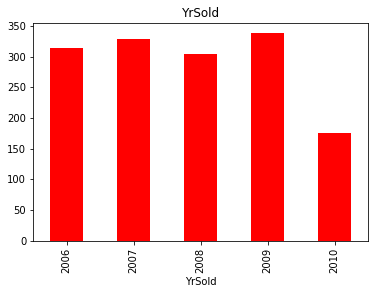

In [28]:
for fea in year_fea:
    print(fea)
    data=df_train.copy()
    data[fea].value_counts(sort=False).plot(kind='bar',color='r')
    plt.xlabel(fea)
    plt.title(fea)
    plt.show

#sales price와의 관계

-yrsold와 그 외 다른 변수와의 연도 시기 차이 계산하면 통상적으로 연수가 짧으면 매매가도 올라가고 연수가 길면 매매가 하락하는것 예상 가능

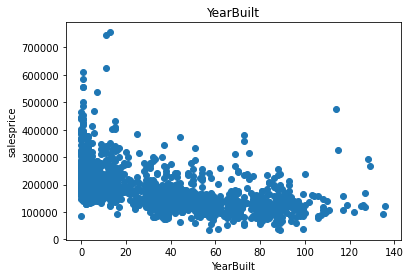

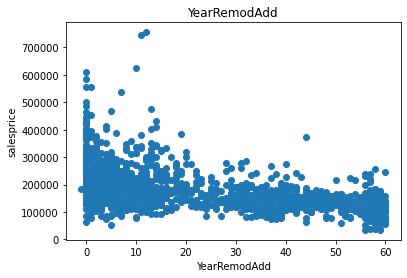

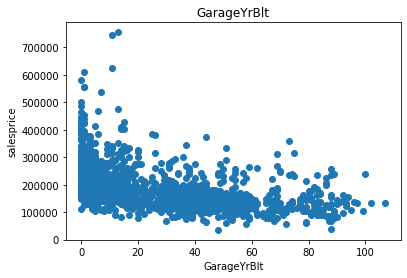

In [29]:
for fea in year_fea:
    if fea!='YrSold':
        data=df_train.copy()
        data[fea]=data['YrSold']-data[fea]
        plt.scatter(data[fea],data['SalePrice'])
        plt.title(fea)
        plt.xlabel(fea)
        plt.ylabel('salesprice')
        plt.show()

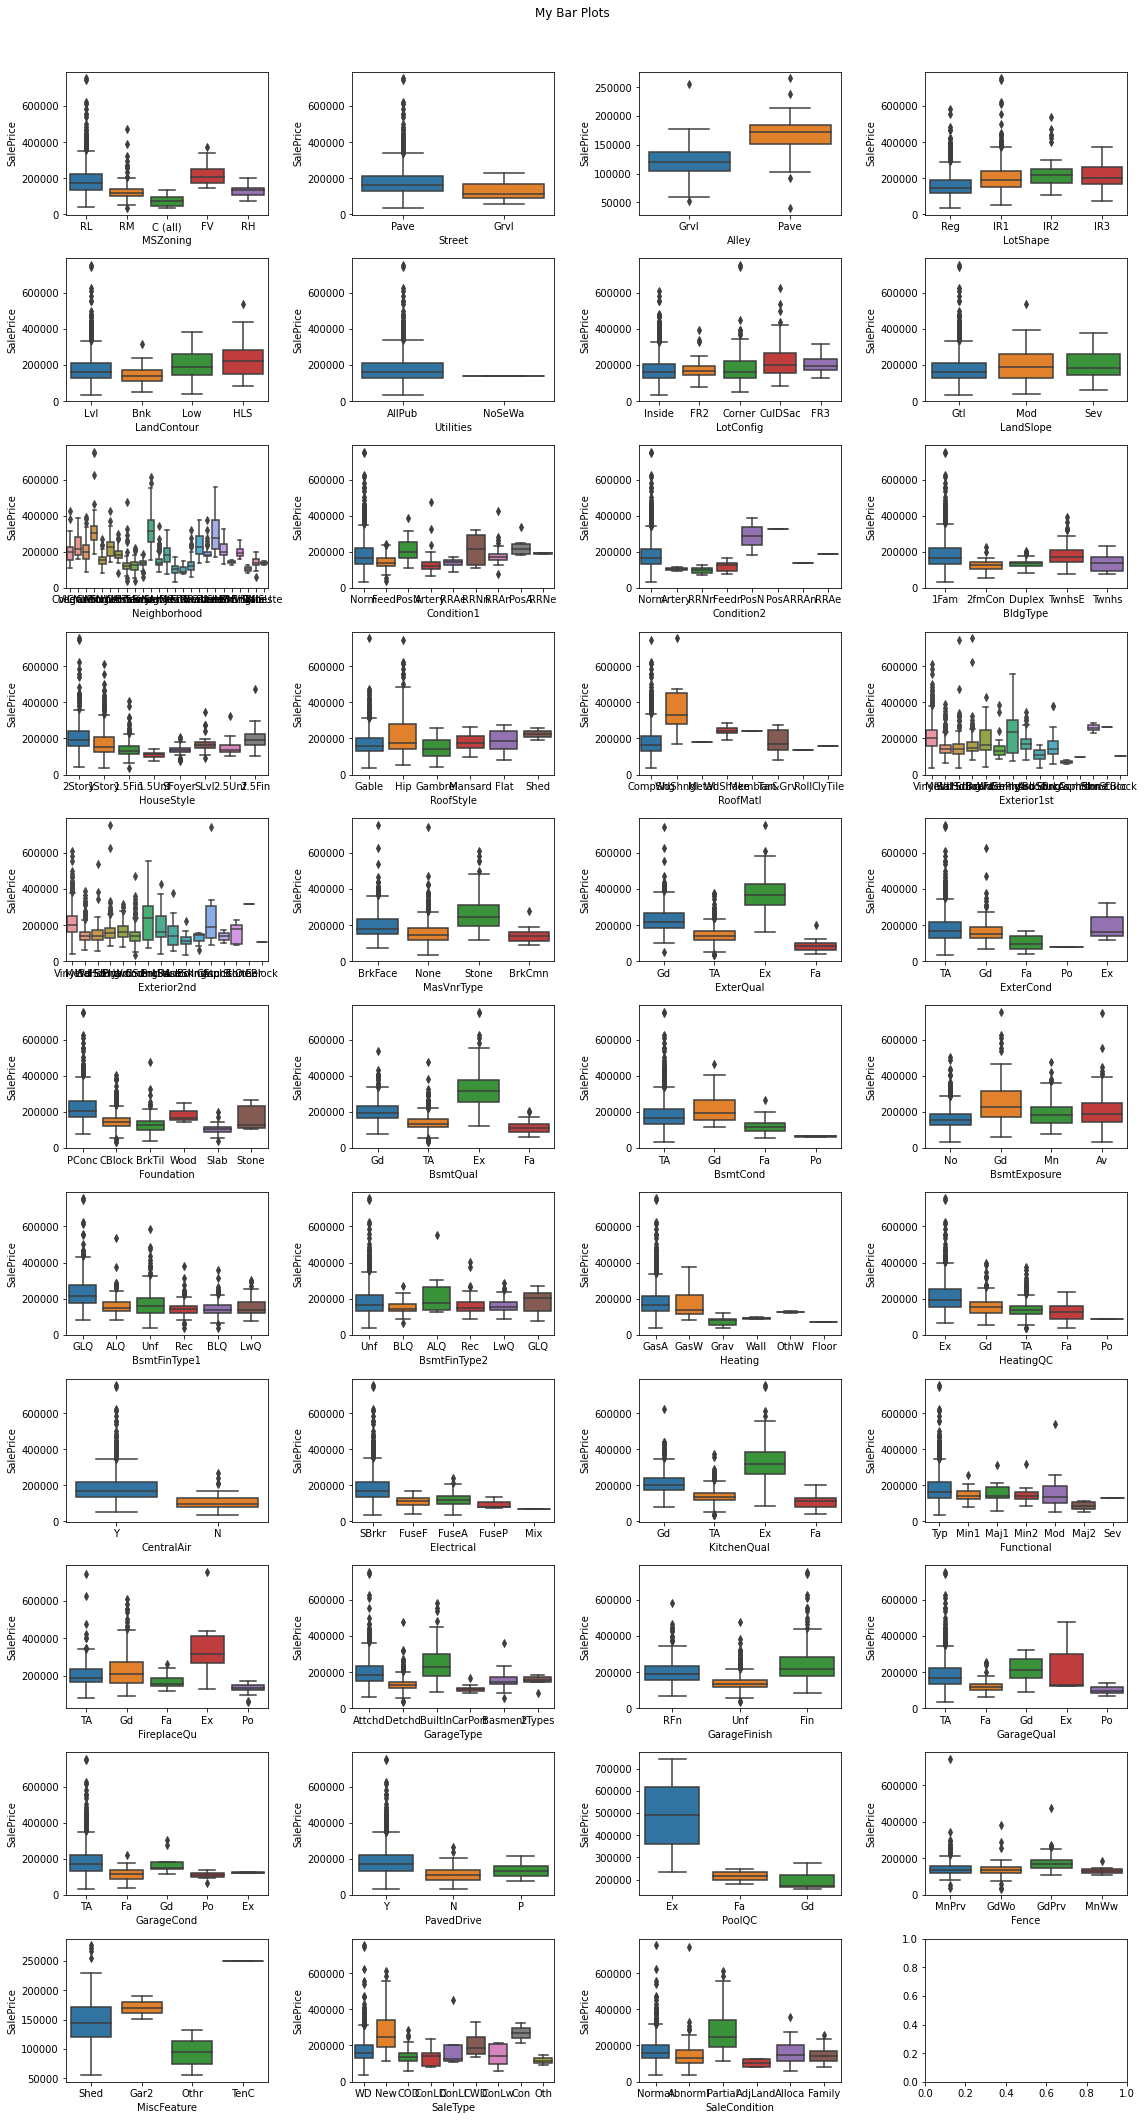

In [30]:
fig, ax = plt.subplots(11, 4, figsize=(16, 30)) # 그래프의 행과 열 지정 및, 이미지 사이즈 지정
data = pd.concat([categorical_features, train['SalePrice']], axis=1)
data.columns[0:]

for i, col in enumerate(data.columns[0:43]): # 좌표 평면 지정
     if i <= 3:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[0,i]) # 1행 좌표 평면
     elif i <= 7:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[1,i-4]) # 2행 좌표 평면
     elif i <= 11:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[2,i-8]) # 3행 좌표 평면
     elif i <= 15:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[3,i-12]) # 4행 좌표 평면
     elif i <= 19: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[4,i-16]) # 5행 좌표 평면
     elif i <= 23: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[5,i-20]) # 6행 좌표 평면
     elif i <= 27: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[6,i-24]) # 7행 좌표 평면
     elif i <= 31: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[7,i-28]) # 8행 좌표 평면
     elif i <= 35: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[8,i-32]) # 9행 좌표 평면
     elif i <= 39: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[9,i-36]) # 10행 좌표 평면
     else: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[10,i-40]) # 11행 좌표 평면

fig.suptitle('My Bar Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

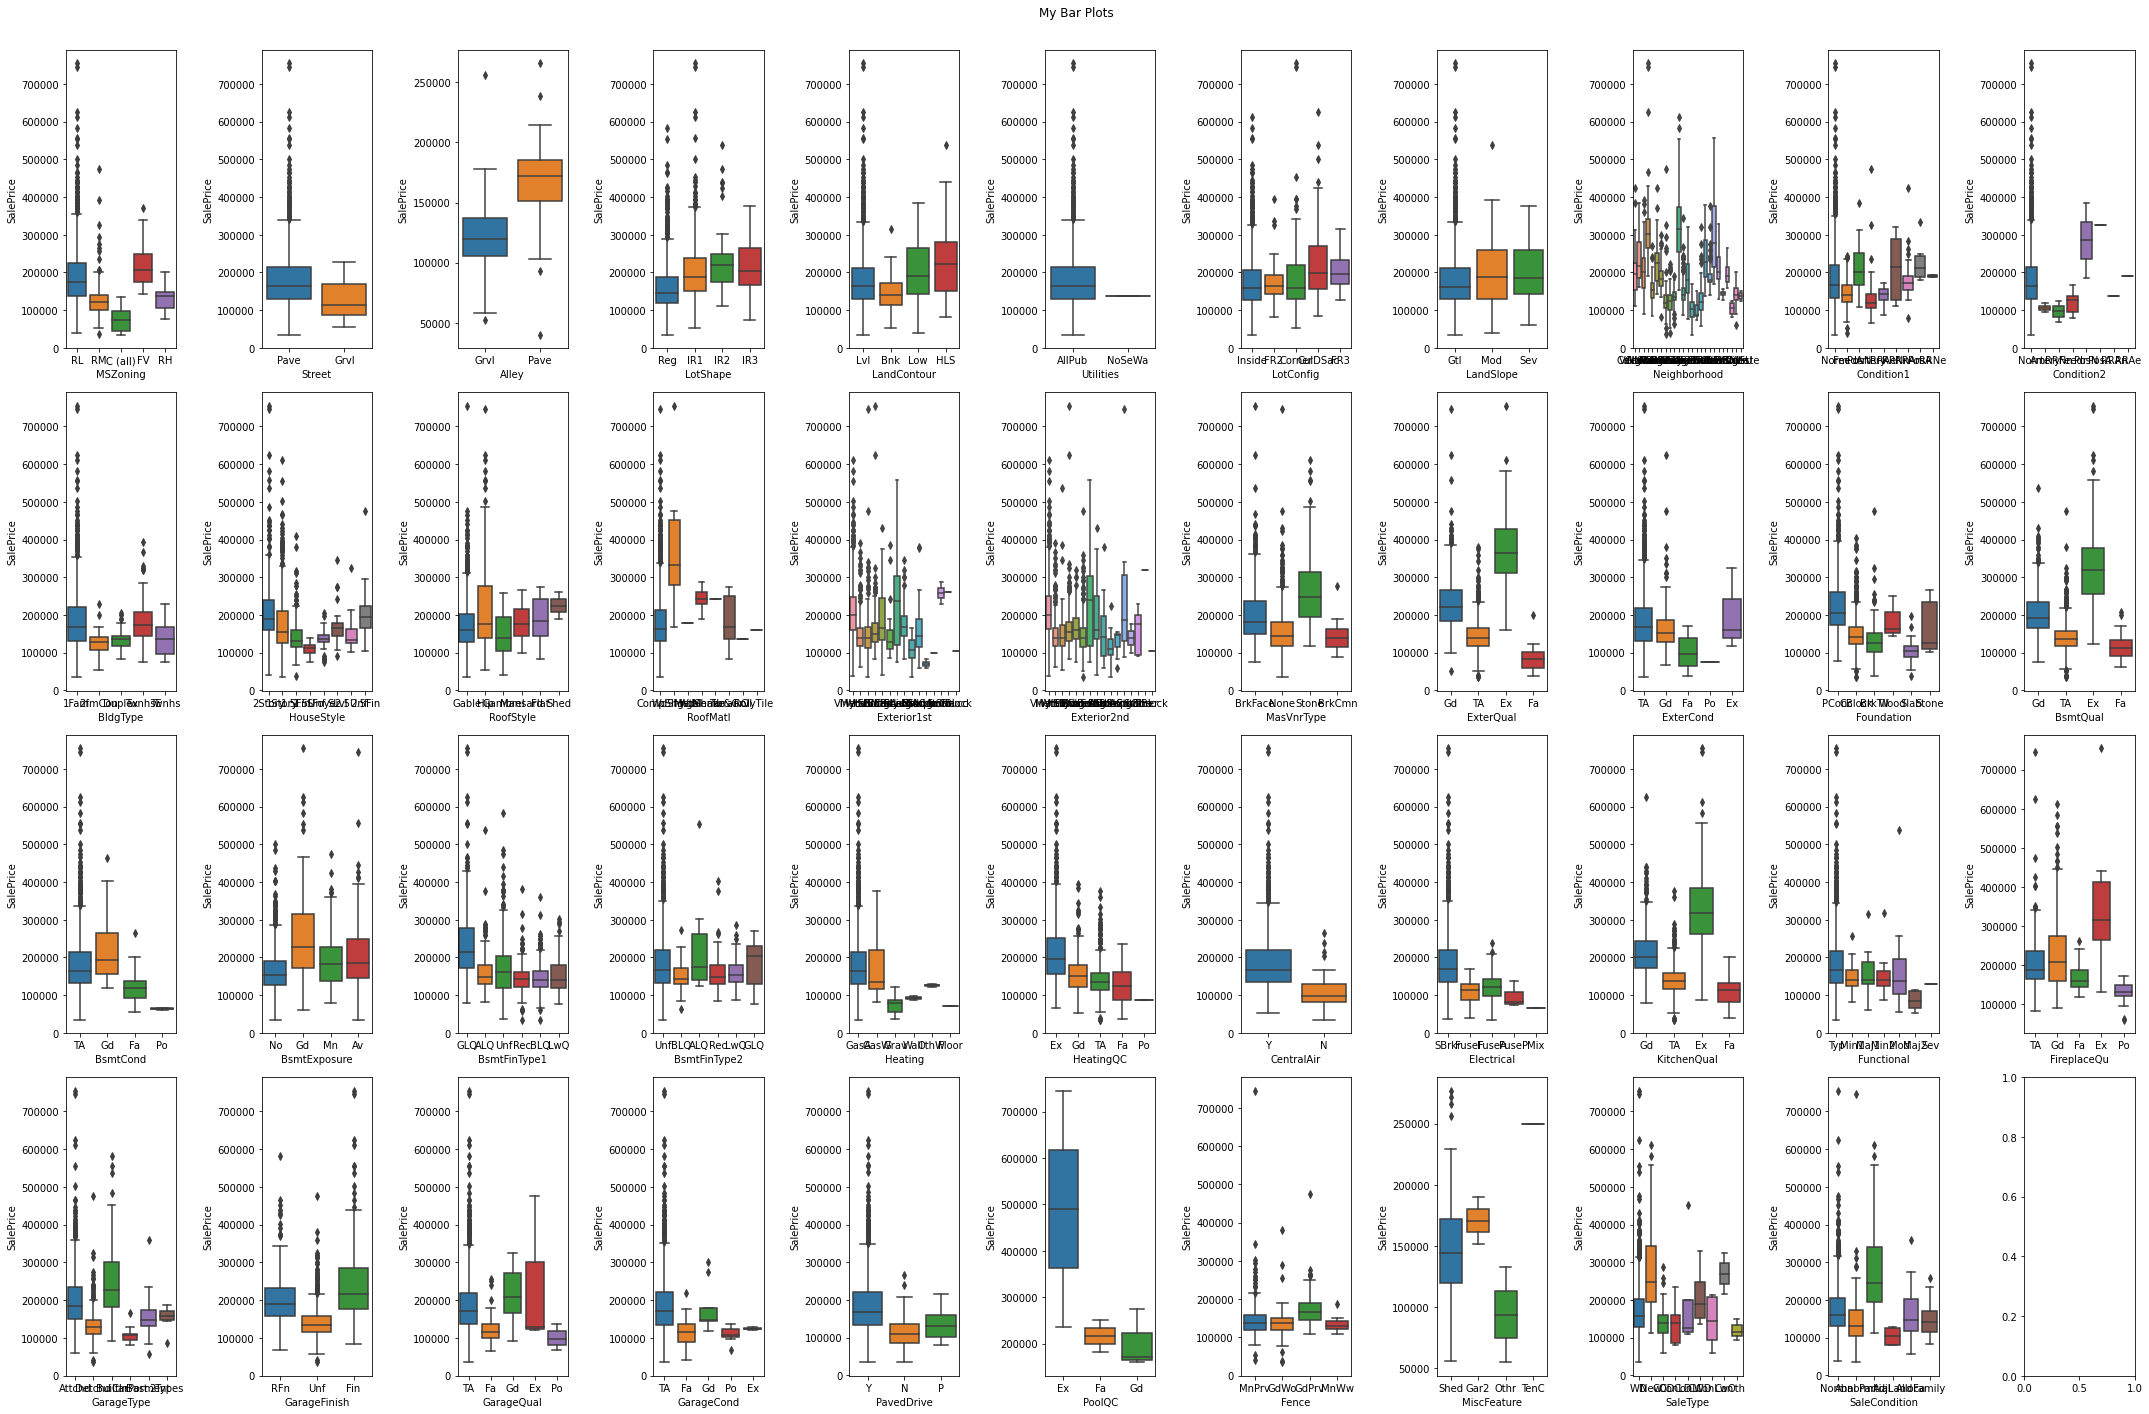

In [31]:
fig, ax = plt.subplots(4,11,figsize=(30,20)) # 그래프의 행과 열 지정 및, 이미지 사이즈 지정
data = pd.concat([categorical_features, train['SalePrice']], axis=1)
data.columns[0:]

for i, col in enumerate(data.columns[0:43]): # 좌표 평면 지정
     if i <= 10:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[0,i]) # 1행 좌표 평면
     elif i <= 21:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[1,i-11]) # 2행 좌표 평면
     elif i <= 32:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[2,i-22]) # 3행 좌표 평면
     else: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[3,i-33]) # 11행 좌표 평면

fig.suptitle('My Bar Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)